In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs #ample clustered data banane ke liye


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [ ]:
X,y = make_blobs(
    n_samples=500, #data points
    n_features=2,
    centers = 3, #natural clusters
    random_state=42
)  #X ek 2d array hai

plt.scatter(X[:,0],X[:,1])
plt.title("Raw Unlabeld Data")
plt.show() 

X,y = make_blobs()

X[:, 0]
✔️ Sab rows ka first column
→ x-axis ke values

X[:, 1]
✔️ Sab rows ka second column
→ y-axis ke values

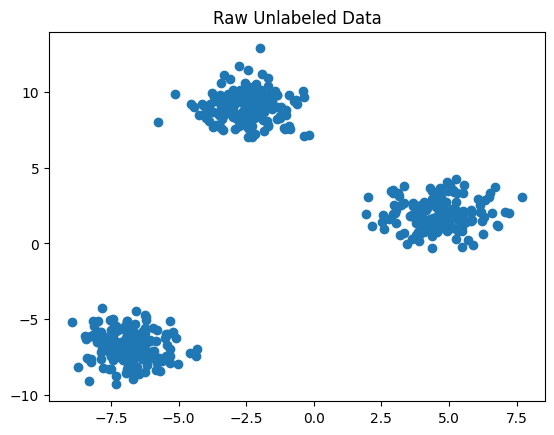

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Raw Unlabeled Data")
plt.show()


In [6]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42
)

In [7]:
kmeans.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


🔍 Internally kya hota hai:

Random centroids
→ Assign points
→ Update centroids
→ Repeat until stable

In [8]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_


labels = kmeans.labels_
centers = kmeans.cluster_centers_

labels → har data point ka cluster ID (0,1,2)
centers → final centroid positions

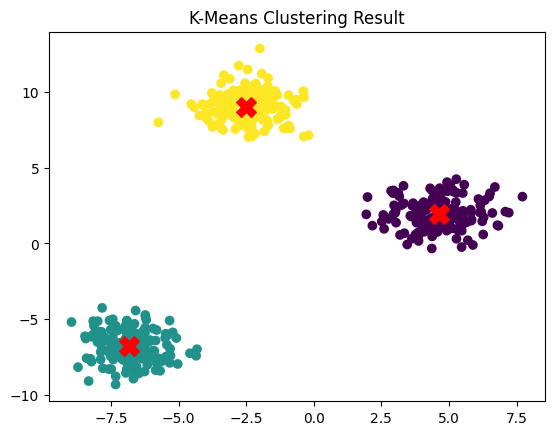

In [11]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='red',marker='X',s=200)
plt.title("K-Means Clustering Result")
plt.show()

centers[:, 0] → centroid ka x
centers[:, 1] → centroid ka y
s=200 → size bada (important point dikhane ke liye)

Elbow method : finding best K (elbow)
Inertia = clusters ke andar points ka spread
Kam inertia → tighter clusters

In [13]:
inertia = []
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)




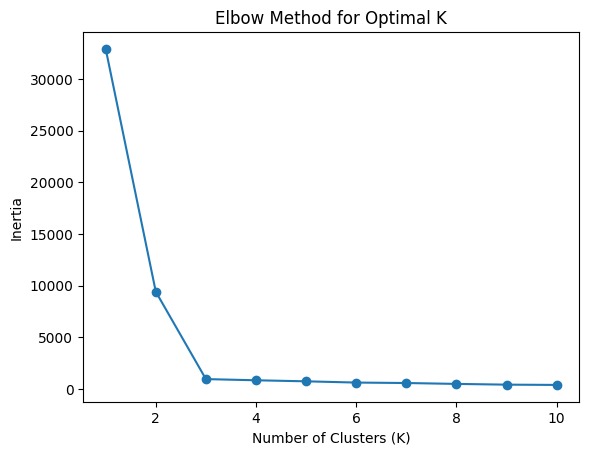

In [14]:
# plot Elbow Curve
plt.plot(K_range,inertia,marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


DBACAN density ke anusar clusters banata hai jo bach jaye vo noise ho jata hai


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [18]:
X,y = make_blobs(
    n_samples=300,
    centers = 4,
    cluster_std=0.6,
    random_state=0
)

X = StandardScaler().fit_transform(X)



In [ ]:
db = DBSCAN(eps=0.3,min_samples=10)
labels = db.fit_predict(X) #points kis cluster mein belong krta hai
 #-1 for noise

In [ ]:
unique_labels = set(labels) #db mein kitne alag alag cluster bane hain unko nikalo
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

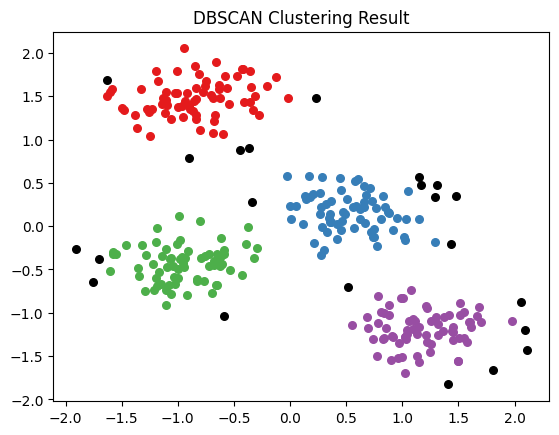

In [ ]:
for k in unique_labels:
    if k == -1:
        color = 'k'
    else:
        color = plt.cm.Set1(k) #color map
    class_mask = (labels == k) #particular cluster ke points ko select krne ke liye
    plt.scatter(X[class_mask, 0], X[class_mask, 1], c=[color], s=30)

plt.title("DBSCAN Clustering Result")
plt.show()

In [27]:
#silhouette score 
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5942168218296967


PCA :: PCA data ko ghoomata (rotate) hai
aur wahi direction choose karta hai
jahan data sabse zyada spread hota hai.

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  
X_scaled = StandardScaler().fit_transform(X)


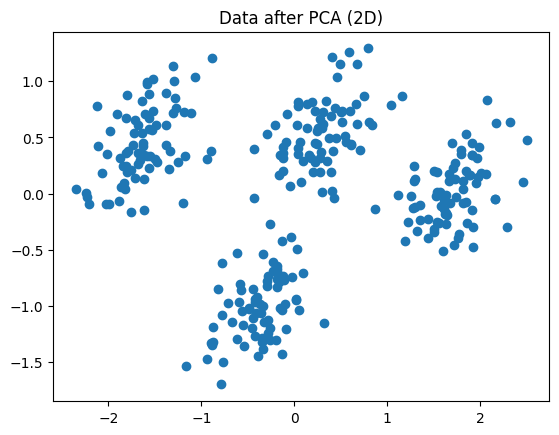

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.title("Data after PCA (2D)")
plt.show()

In [ ]:
pca.explained_variance_ratio_    #90% info retained 

array([0.76969335, 0.23030665])

In [ ]:
# PCA + Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)
